In [1]:
import numpy as np
import pandas as pd
from earthscopestraintools.mseed_tools import ts_from_mseed
from earthscopestraintools.gtsm_metadata import GtsmMetadata
from earthscopestraintools.timeseries import Timeseries, plot_timeseries_comparison

import matplotlib.pyplot as plt

import logging
logger = logging.getLogger()
logging.basicConfig(
        format="%(message)s", level=logging.INFO
    )

%load_ext autoreload
%autoreload 2

**Instructions for the activity:** 

For these partner exercises, you will have a station and date range to explore. Your goal is to identify an interesting signal, using ```earthscopestraintools``` to better visualize and understand potential causes of the anomolous strain. You may explore other datasets and conduct simple research to complement your work (e.g., are there other strainmeters nearby to analyze? where is the instrument and what could be causing the signal?) - however, we request that you do NOT dive into the scientific literature, and remain data driven in your explorations. We suggest you start with a 1 Hz sampling rate for <1 mo of data, and 10 minute sampling period for >1 mo of data. You may decide on a better sampling rate for your signal after preliminary analyses. **Compile information for your projects with visuals in a mini powerpoint presentation to share with the group - please share your processing workflow along with your preliminary conclusions, as well as any code, instrumental, or other complications you encountered and how you overcame the issues.**

Other resources you may find useful for comparison: 
- [UNR map browse of GNSS stations with displacement timeseries](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap.html)
- [EarthScope map browse of stations](https://www.unavco.org/instrumentation/networks/map/map.html#!/)
- [USGS earthquake catalogue](https://earthquake.usgs.gov/earthquakes/search/)

### Seiches at B944

>Luttrell, K., Mencin, D., Francis, O. and Hurwitz, S. (2013), Constraints on the upper crustal magma reservoir beneath Yellowstone Caldera inferred from lake-seiche induced strain observations, Geophys. Res. Lett., 40, 501–506, doi:10.1002/grl.50155

Suggestions: 
- Acquire metadata and data.
- Remove trend, tides, and pressure from the signal. 
- Zoom in on the signal and characterize its period, amplitude, and emergence.
- Take a look at the signal transformed to areal, differential, and shear strains. 
- Where is the station? What is around it that could be causeing the anomolous strain?
- Locate the same signal in any neighboring stations, if there are any (suggest looking on the earthscope site for station locations).

Starting point: 
```
network = 'PB'
station = 'B944'
start = '2009-07-01'
end = '2009-07-20'
```



PB B944 Loading T0 LS* from 2009-07-01 to 2009-07-20 from Earthscope DMC miniseed
    Trace 1. 2009-07-01T00:00:00.000000Z:2009-07-20T00:00:00.000000Z mapping LS1 to CH0
    Trace 2. 2009-07-01T00:00:00.000000Z:2009-07-20T00:00:00.000000Z mapping LS2 to CH1
    Trace 3. 2009-07-01T00:00:00.000000Z:2009-07-20T00:00:00.000000Z mapping LS3 to CH2
    Trace 4. 2009-07-01T00:00:00.000000Z:2009-07-20T00:00:00.000000Z mapping LS4 to CH3
    Found 0 epochs with nans, 1838.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.11%
  Converting 999999 gap fill values to nan
    Found 1838 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.11%
Converting raw counts to microstrain
    Found 1838 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.11%
PB.B944.T0.LS*.linearized
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2009-07-01 00:00:00 - 2009-07-19 23:59:59        

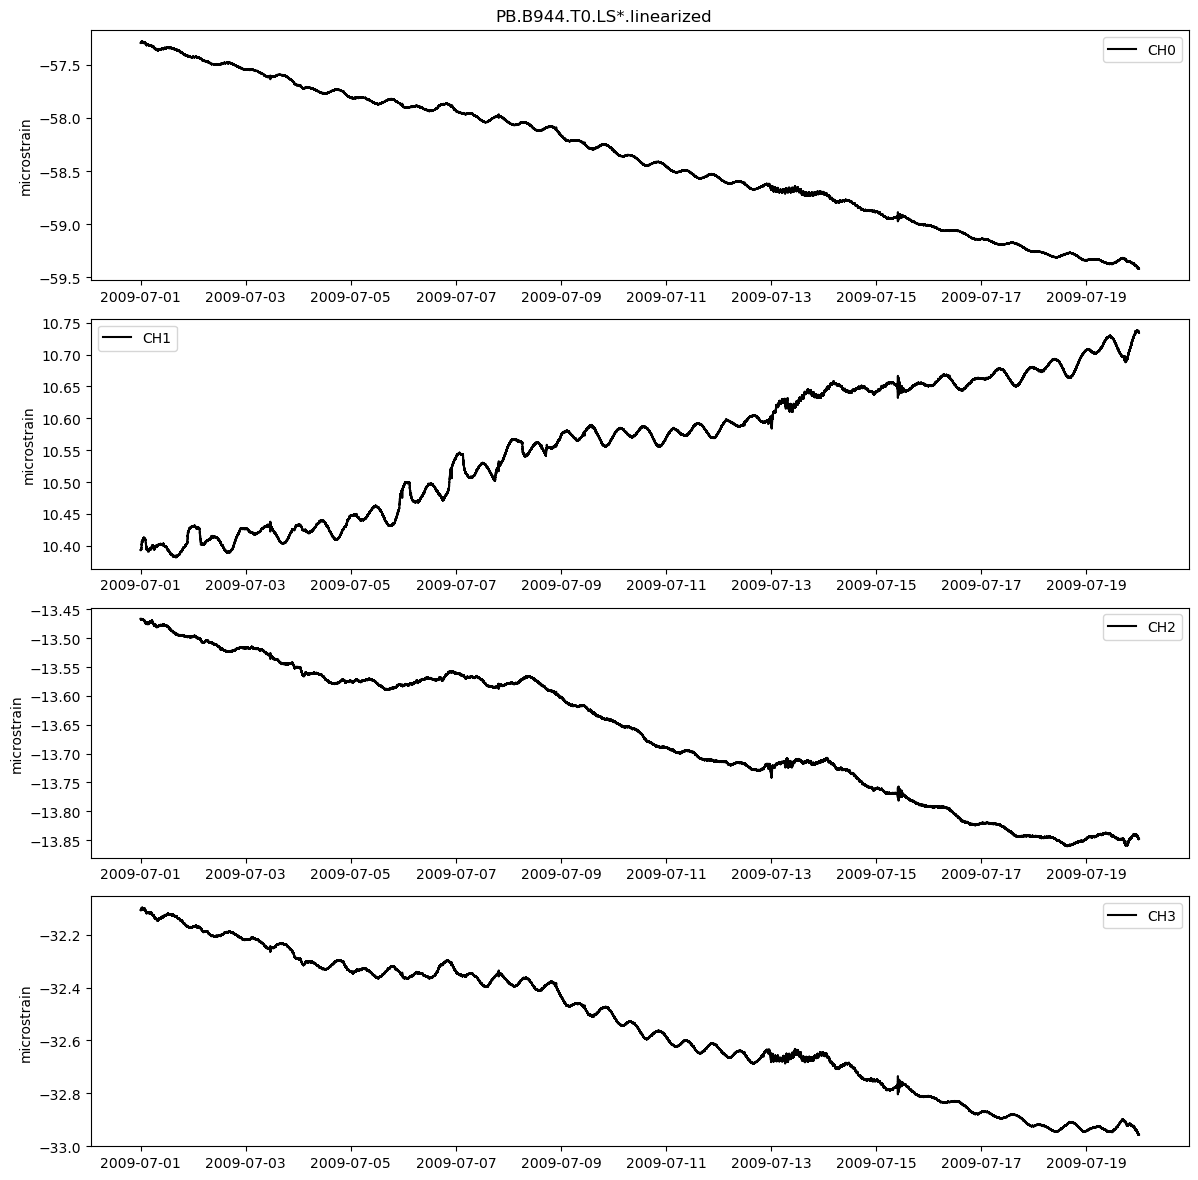

In [ ]:
# Gather data for seiches

network = 'PB'
station = 'B944'
start = '2009-07-01'
end = '2009-07-20'

meta = GtsmMetadata(station=station,network=network)

strain_raw = ts_from_mseed(network=network, station=station, location='T0', channel='LS*', start=start, end=end)
gauge_microstrain = strain_raw.linearize(reference_strains=meta.reference_strains, gap=meta.gap)

gauge_microstrain.stats()
gauge_microstrain.plot()

## 2019 Ridgecrest Earthquake Sequence

> Hanagan et al., In Review.

Two large magnitude earthquakes from the 2019 Ridgecrest Sequence with aftershocks and significant postseismic strain accumulation. 

Suggestions: 
- Acquire metadata and data
- Remove trend, tides, and pressure from the signal. 
- Look at the signal from the gauges as transformed areal, differential, and shear strains.
- Zoom in on the signal(s) and characterize what is happening before, during, and after the signal. 
- Where is the station? What is around it? What other data can help you tell what is happening at that time?
- Locate the same signal in any neighboring stations that might corroborate findings. 

Starting point: 
```
network = 'PB'
station = 'B921'
start = '2019-07-01'
end = '2019-07-20'
```

PB B921 Loading T0 LS* from 2019-07-01 to 2019-07-20 from Earthscope DMC miniseed
    Trace 1. 2019-07-01T00:00:00.000000Z:2019-07-20T00:00:00.000000Z mapping LS1 to CH0
    Trace 2. 2019-07-01T00:00:00.000000Z:2019-07-20T00:00:00.000000Z mapping LS2 to CH1
    Trace 3. 2019-07-01T00:00:00.000000Z:2019-07-20T00:00:00.000000Z mapping LS3 to CH2
    Trace 4. 2019-07-01T00:00:00.000000Z:2019-07-20T00:00:00.000000Z mapping LS4 to CH3
    Found 0 epochs with nans, 2314.75 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.14%
  Converting 999999 gap fill values to nan
    Found 2314 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.14%
Converting raw counts to microstrain
    Found 2314 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.14%
PB.B921.T0.LS*.linearized
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2019-07-01 00:00:00 - 2019-07-19 23:59:59       

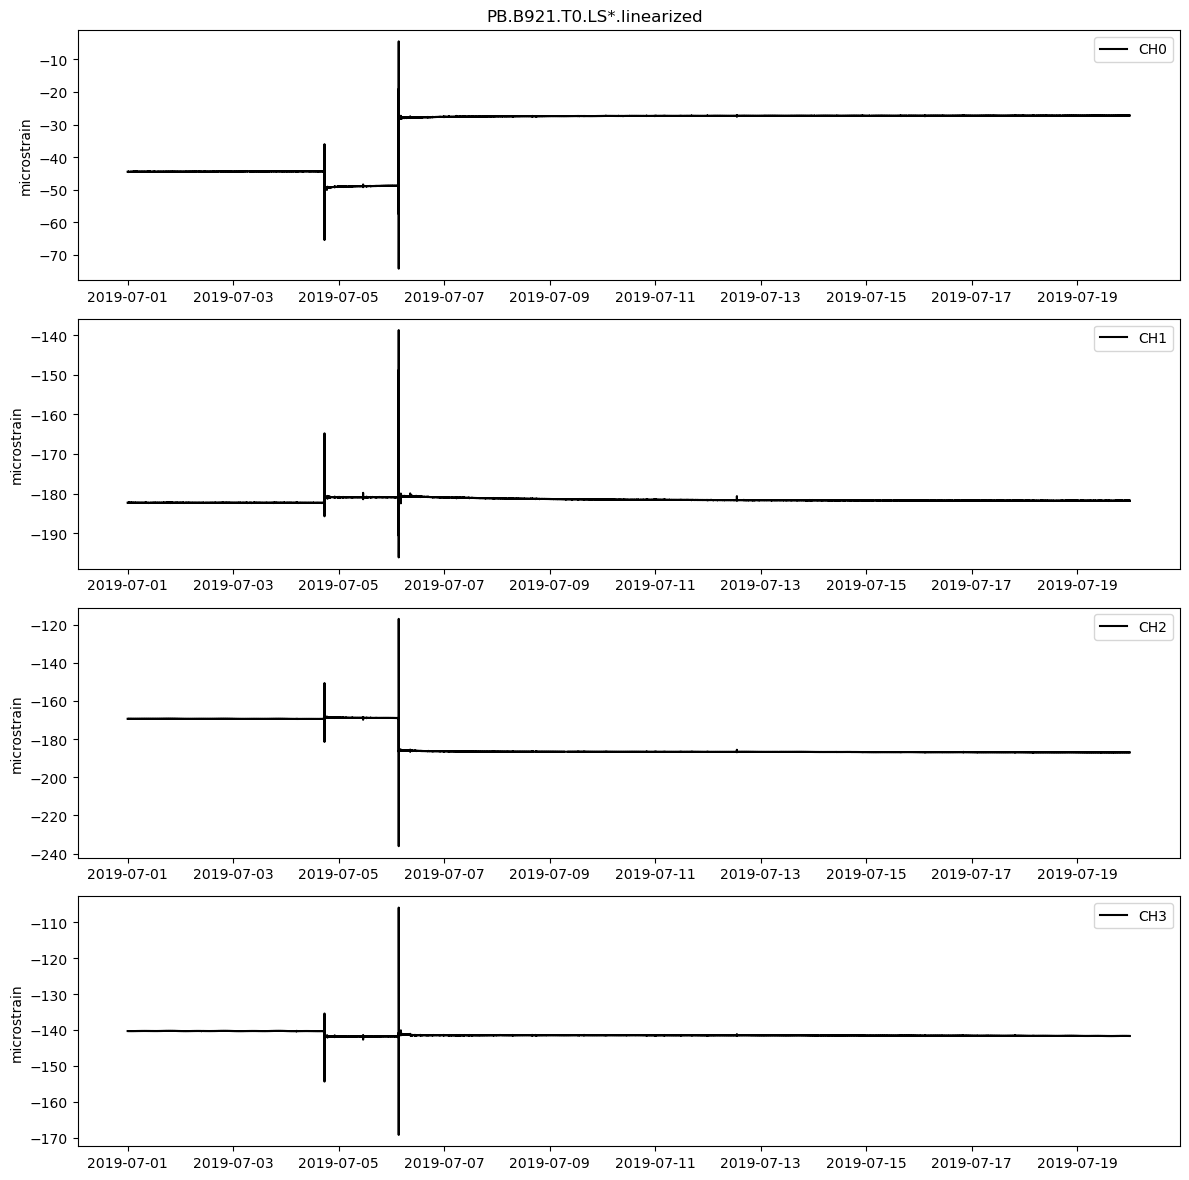

In [ ]:
network = 'PB'
station = 'B921'
start = '2019-07-01'
end = '2019-07-20'

meta = GtsmMetadata(station=station,network=network)

strain_raw = ts_from_mseed(network=network, station=station, location='T0', channel='LS*', start=start, end=end)
gauge_microstrain = strain_raw.linearize(reference_strains=meta.reference_strains, gap=meta.gap)

gauge_microstrain.stats()
gauge_microstrain.plot()

## Slow slip in Cascadia

> Hawthorne, J. C., and A. M. Rubin (2010), Tidal modulation of slow slip in Cascadia, J. Geophys. Res., 115, B09406, doi:10.1029/2010JB007502.

B004 will also show a slow slip event. 

Suggestions: 
- Acquire metadata and data (note the long period of time - 10 minute sample period might be a good starting point).
- Remove trend, tides, and pressure from the signal. 
- Look at the signal from the gauges as transformed areal, differential, and shear strains.
- Zoom in on the signal(s) and characterize what is happening before, during, and after the signal. 
- Where is the station? What is around it? What other data can help you tell what is happening at that time?
- Locate the same signal in any neighboring stations that might corroborate findings. 

Starting point: 
```
network = 'PB'
station = 'B007'
start = '2008-04-01'
end = '2008-07-01'
```

PB B007 Loading T0 RS* from 2008-04-01 to 2008-07-01 from Earthscope DMC miniseed
    Trace 1. 2008-04-01T00:00:00.000000Z:2008-07-01T00:00:00.000000Z mapping RS1 to CH0
    Trace 2. 2008-04-01T00:00:00.000000Z:2008-07-01T00:00:00.000000Z mapping RS2 to CH1
    Trace 3. 2008-04-01T00:00:00.000000Z:2008-07-01T00:00:00.000000Z mapping RS3 to CH2
    Trace 4. 2008-04-01T00:00:00.000000Z:2008-07-01T00:00:00.000000Z mapping RS4 to CH3
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
  Converting 999999 gap fill values to nan
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Converting raw counts to microstrain
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
PB.B007.T0.RS*.linearized
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2008-04-01 00:00:00 - 2008-06-30 23:50:00        | Period:   

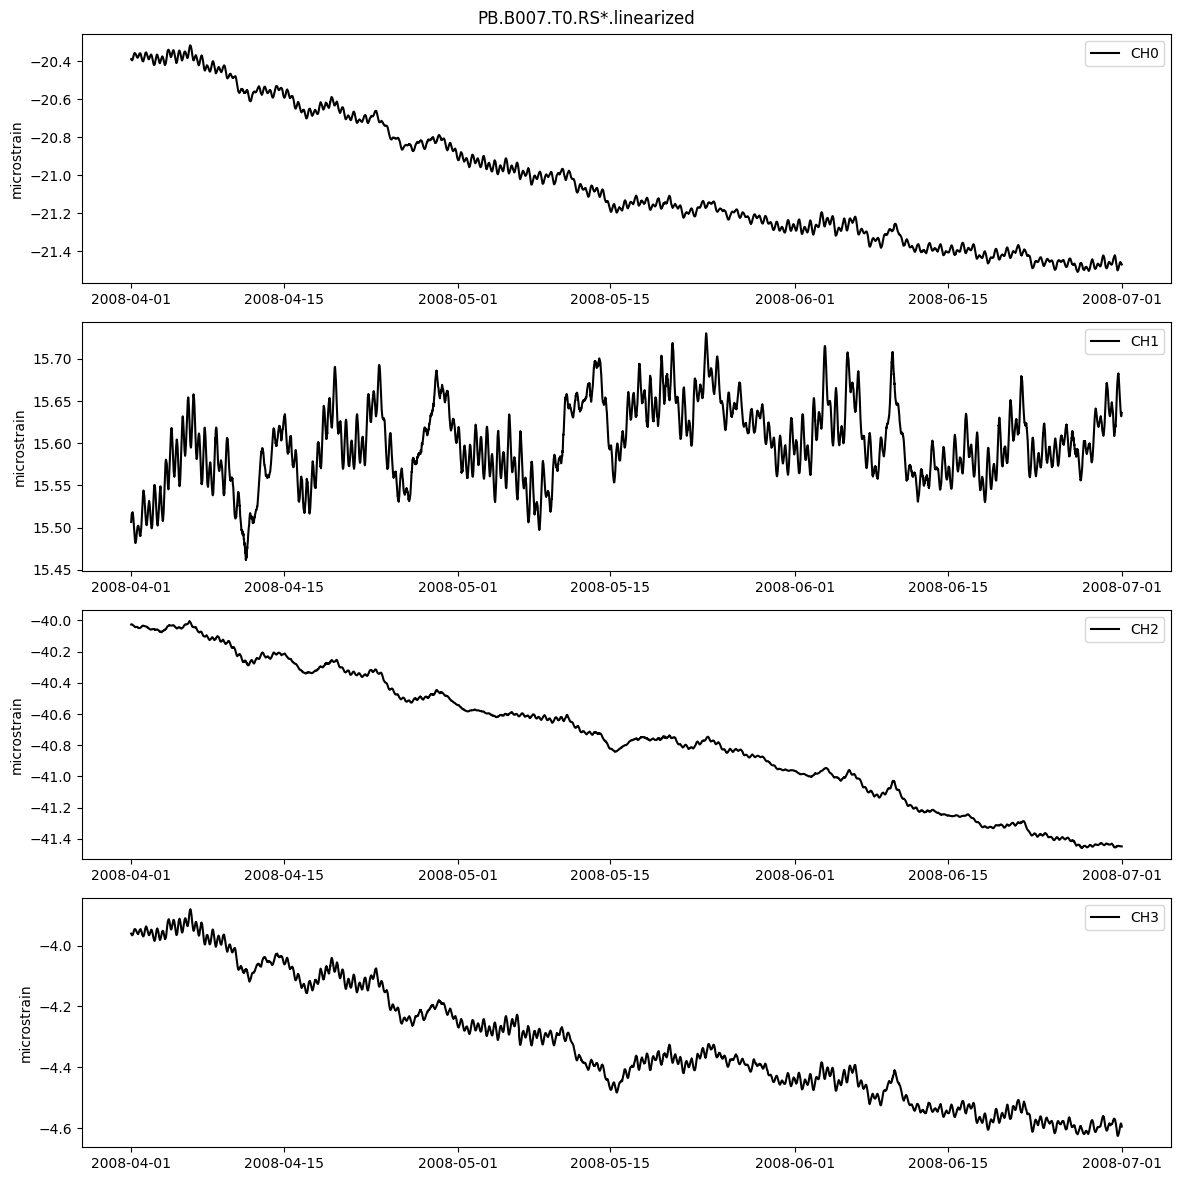

In [2]:
network = 'PB'
station = 'B007'
start = '2008-04-01'
end = '2008-07-01'

meta = GtsmMetadata(station=station,network=network)

strain_raw = ts_from_mseed(network=network, station=station, location='T0', channel='RS*', start=start, end=end)
gauge_microstrain = strain_raw.linearize(reference_strains=meta.reference_strains, gap=meta.gap)

gauge_microstrain.stats()
gauge_microstrain.plot()

In [3]:
# Corrections
tide_c = gauge_microstrain.calculate_tide_correction(tidal_parameters=meta.tidal_params,longitude=meta.longitude)

atmp_raw = ts_from_mseed(network=network,station=station,location='TS',channel='RDO',
                     scale_factor=0.001,start=start,end=end)
atmp = atmp_raw.interpolate(new_index=gauge_microstrain.data.index)
atmp_c = atmp.calculate_pressure_correction(response_coefficients=meta.atmp_response)
trend_c = gauge_microstrain.linear_trend_correction(method='median')

Calculating tide correction


    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
PB B007 Loading TS RDO from 2008-04-01 to 2008-07-01 from Earthscope DMC miniseed
    Trace 1. 2008-04-01T00:00:00.000000Z:2008-07-01T00:00:00.000000Z mapping RDO to atmp
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
  Converting 999999 gap fill values to nan
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Interpolating data using method=linear and limit=6
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Calculating pressure correction
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Calculating linear trend correction
    Trend Start: 2008-04-01 00:00:00
    Trend End: 2008-06-30 23:50:00
  Median trend calculated with points 23.66666666666666

In [33]:
# Corrected regional strains
corrected_microstrain = gauge_microstrain.apply_corrections([tide_c,atmp_c,trend_c])
reg_strain = corrected_microstrain.apply_calibration_matrix(calibration_matrix=meta.strain_matrices['lab'])

Applying corrections
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying None matrix: [[ 0.2963  0.5185  0.2963  0.2222]
 [-0.3891  0.0258  0.3788 -0.0155]
 [ 0.047  -0.3695  0.1007  0.2217]]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


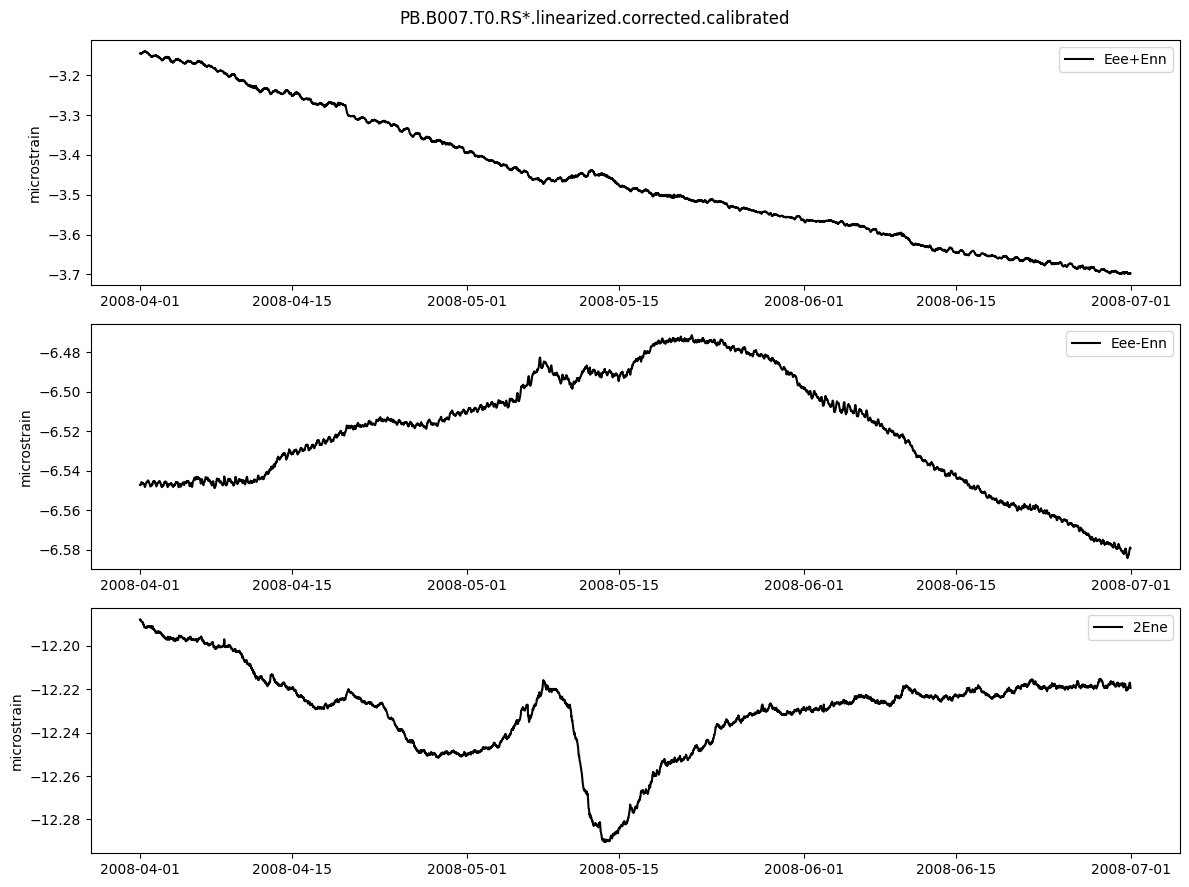

In [34]:
reg_strain.plot()

## Rain

Canitano Floods September 15th and 16th, 2023.

Suggestions: 
- Acquire metadata and data.
- Remove trend, tides, and pressure from the signal. 
- Look at the signal from the gauges as transformed areal, differential, and shear strains.
- Zoom in on the signal(s) and characterize what is happening before, during, and after the signal. 
- Where is the station? What is around it? What other data can help you tell what is happening at that time?
- Locate other data that may be contributing to the signal, including data from neighboring stations that might corroborate findings. 

Starting point: 
```
network = 'PB'
station = 'B007'
start = '2008-04-01'
end = '2008-07-01'
```



IV TSM2 Loading T0 LS* from 2022-09-09 to 2022-09-17 from Earthscope DMC miniseed
    Trace 1. 2022-09-09T00:00:00.000000Z:2022-09-17T00:00:00.000000Z mapping LS1 to CH0
    Trace 2. 2022-09-09T00:00:00.000000Z:2022-09-17T00:00:00.000000Z mapping LS2 to CH1
    Trace 3. 2022-09-09T00:00:00.000000Z:2022-09-17T00:00:00.000000Z mapping LS3 to CH2
    Trace 4. 2022-09-09T00:00:00.000000Z:2022-09-17T00:00:00.000000Z mapping LS4 to CH3
    Found 0 epochs with nans, 190.25 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.03%
  Converting 999999 gap fill values to nan
    Found 190 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.03%
Converting raw counts to microstrain
    Found 190 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.03%
IV.TSM2.T0.LS*.linearized
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2022-09-09 00:00:00 - 2022-09-16 23:59:59        | 

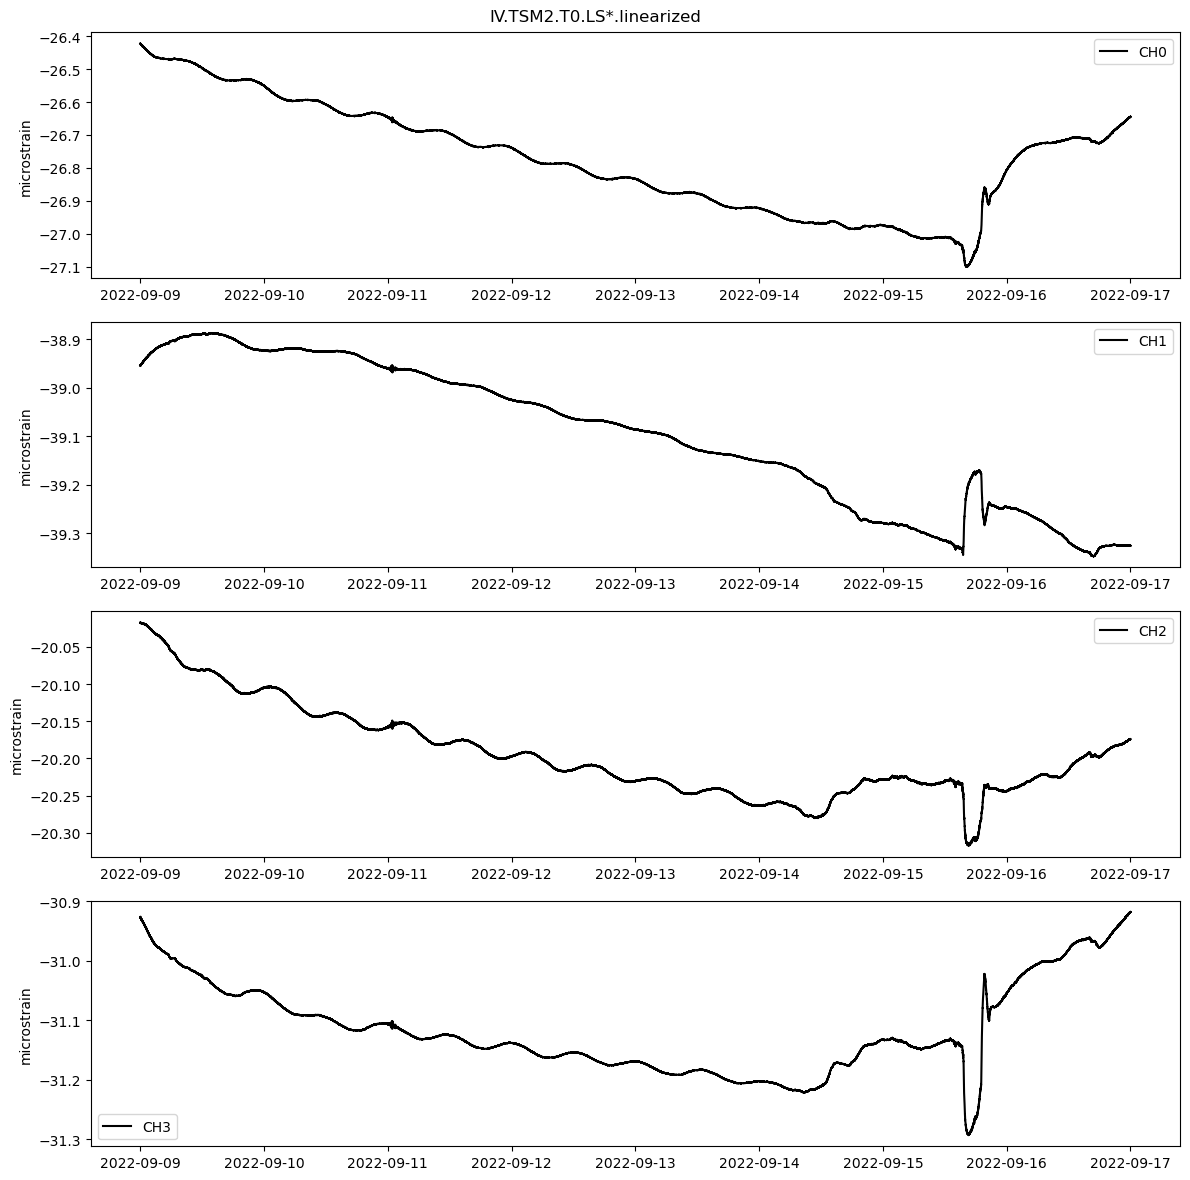

In [73]:
network = 'IV'
station = 'TSM2'
start = '2022-09-09'
end = '2022-09-17'

meta = GtsmMetadata(station=station,network=network)

strain_raw = ts_from_mseed(network=network, station=station, location='T0', channel='LS*', start=start, end=end)
gauge_microstrain = strain_raw.linearize(reference_strains=meta.reference_strains, gap=meta.gap)

gauge_microstrain.stats()
gauge_microstrain.plot()

## Turkey Earthquake

Teleseismic strains from the Turkey earthquake sequence, February 6th, 2023. 

Suggestions: 
- Acquire metadata and data.
- Remove trend, tides, and pressure from the signal. 
- Look at the signal from the gauges as transformed areal, differential, and shear strains.
- Zoom in on the signal(s) and characterize what is happening before, during, and after the signal. 
- Where is the station? What is around it? What other data can help you tell what is happening at that time?
- Gather other data that describes what may be contributing to the signal, including data from neighboring stations that might corroborate findings. 

Starting point: 
```
network = 'IV'
station = 'TSM6'
start = '2023-02-01'
end = '2023-02-10'
```


IV TSM6 Loading T0 LS* from 2023-02-01 to 2023-02-10 from Earthscope DMC miniseed
    Trace 1. 2023-02-01T00:00:00.000000Z:2023-02-10T00:00:00.000000Z mapping LS1 to CH0
    Trace 2. 2023-02-01T00:00:00.000000Z:2023-02-10T00:00:00.000000Z mapping LS2 to CH1
    Trace 3. 2023-02-01T00:00:00.000000Z:2023-02-10T00:00:00.000000Z mapping LS3 to CH2
    Trace 4. 2023-02-01T00:00:00.000000Z:2023-02-10T00:00:00.000000Z mapping LS4 to CH3
    Found 0 epochs with nans, 5.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
  Converting 999999 gap fill values to nan
    Found 5 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Converting raw counts to microstrain
    Found 5 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
IV.TSM6.T0.LS*.linearized
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2023-02-01 00:00:00 - 2023-02-09 23:59:59        | Period:   

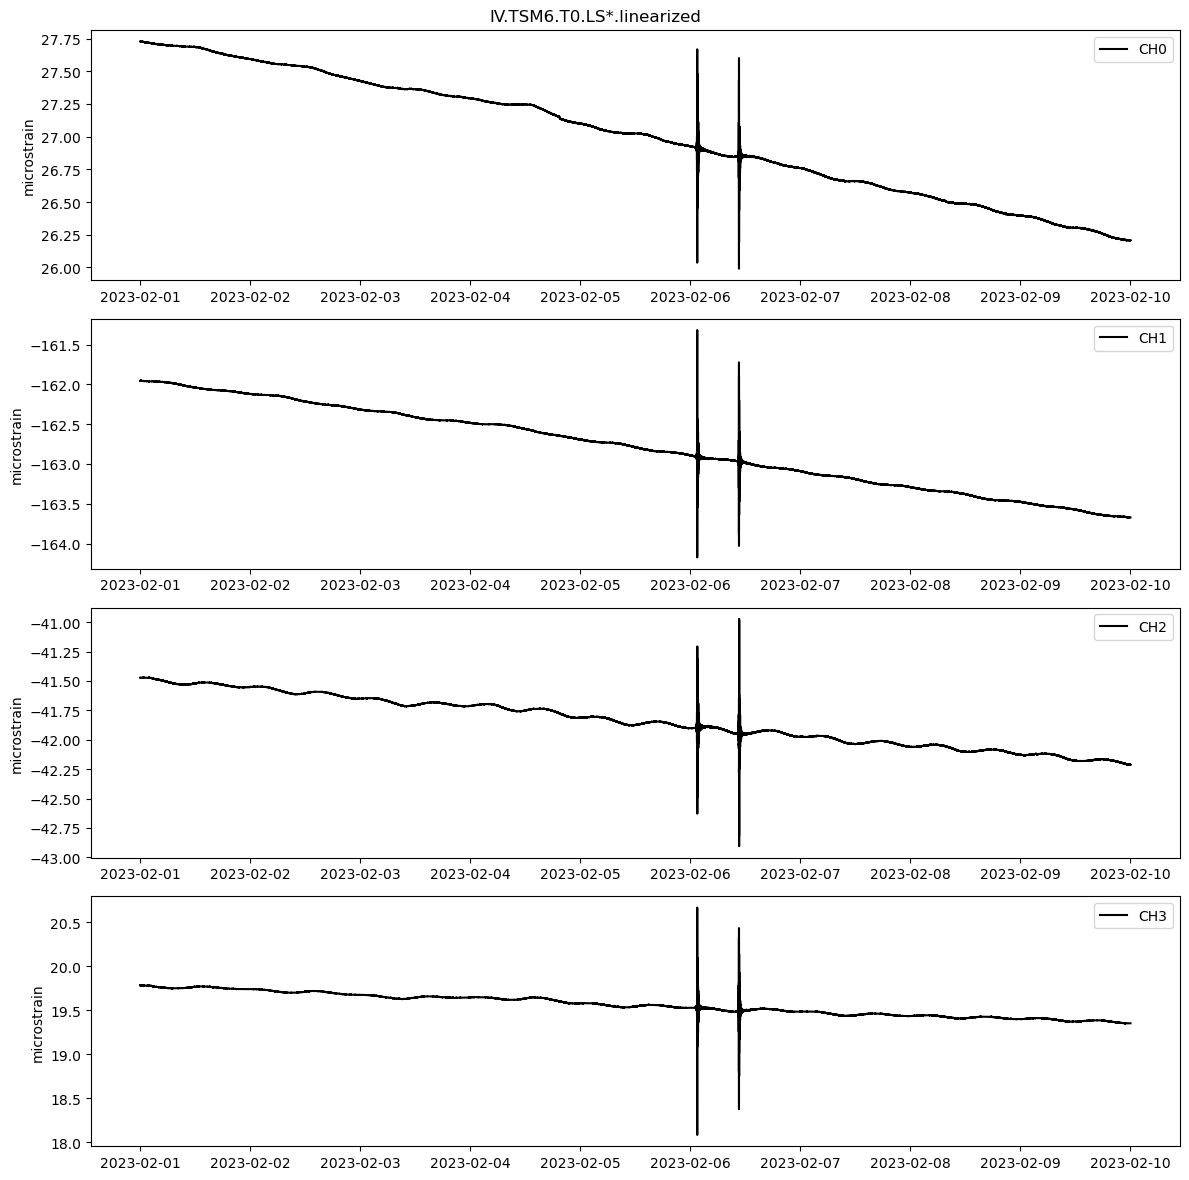

In [19]:
network = 'IV'
station = 'TSM6'
start = '2023-02-01'
end = '2023-02-10'

meta = GtsmMetadata(station=station,network=network)

strain_raw = ts_from_mseed(network=network, station=station, location='T0', channel='LS*', start=start, end=end)
gauge_microstrain = strain_raw.linearize(reference_strains=meta.reference_strains, gap=meta.gap)

gauge_microstrain.stats()
gauge_microstrain.plot()

## Additional Activity

Find another (or several!) creep events on B073, or another station you expect to find creep on. 